# Classification of Images between Dogs and Cats

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
from shutil import copyfile

In [2]:
print (len(os.listdir('Data/PetImages/Cat/')))
print (len(os.listdir('Data/PetImages/Dog/')))

12501
12501


# Creating the directory structure for the Training and Test Data

In [3]:
os.mkdir('Data/cats-v-dogs')
os.mkdir('Data/cats-v-dogs/training')
os.mkdir('Data/cats-v-dogs/testing')
os.mkdir('Data/cats-v-dogs/training/dogs')
os.mkdir('Data/cats-v-dogs/training/cats')
os.mkdir('Data/cats-v-dogs/testing/dogs')
os.mkdir('Data/cats-v-dogs/testing/cats')

In [14]:
# Function to split the data into training and test sets with randomized shuffle

def split_data(Source,Training,Testing,Split_size):
    files = []
    for filename in os.listdir(Source):
        file = Source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print (filename + " " + "is zero size file")
    # Splitting based on random set
    training_length = int(len(files)*Split_size)
    testing_length = int(len(files)-training_length)
    shuffled_set = random.sample(files,len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
    
    #copying the file 
    for filename in training_set:
        this_file = Source + filename
        destination = Training + filename
        copyfile(this_file,destination)
    for filename in testing_set:
        this_file = Source + filename
        destination = Testing + filename
        copyfile(this_file,destination)
        
Cat_Source_Dir = 'Data/PetImages/Cat/'
Cat_Training_Dir = 'Data/cats-v-dogs/training/cats/'
Cat_Testing_Dir = 'Data/cats-v-dogs/testing/cats/'
Dog_Source_Dir = 'Data/PetImages/Dog/'
Dog_Training_Dir = 'Data/cats-v-dogs/training/dogs/'
Dog_Testing_Dir = 'Data/cats-v-dogs/testing/dogs/'

split_size = 0.9
split_data(Cat_Source_Dir,Cat_Training_Dir,Cat_Testing_Dir,split_size)
split_data(Dog_Source_Dir,Dog_Training_Dir,Dog_Testing_Dir,split_size)


     

666.jpg is zero size file
11702.jpg is zero size file


In [15]:
print (len(os.listdir('Data/cats-v-dogs/training/dogs/')))
print (len(os.listdir('Data/cats-v-dogs/training/cats/')))
print (len(os.listdir('Data/cats-v-dogs/testing/dogs/')))
print (len(os.listdir('Data/cats-v-dogs/testing/cats/')))

12385
12362
2385
2362


# Building a simple CNN model

In [6]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [8]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
class MyCallbacks(tf.keras.callbacks.Callback):
    
    def on_stop_epoch(self,epoch,logs={}):
        if (logs.get('acc') > .95):
            print ("The model has reached 51% accuracy so stopping the training now....")
            self.model.stop_training=True
            
        
callbacks = MyCallbacks()
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

# Data through Image Generator

In [16]:
Training_Dir = 'Data/cats-v-dogs/training'
train_gen = ImageDataGenerator(rescale=1.0/255.,
                               rotation_range=50,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               vertical_flip=True,
                               horizontal_flip= True
                               )
training_generator = train_gen.flow_from_directory(directory=Training_Dir,batch_size=32,class_mode='binary',target_size=(150,150))



Validation_Dir ='Data/cats-v-dogs/testing/'
validation_gen = ImageDataGenerator(rescale=1.0/255.,
                                    rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip= True
                                   )
validation_generator = validation_gen.flow_from_directory(directory=Validation_Dir,batch_size=32,class_mode='binary',target_size=(150,150))

Found 24745 images belonging to 2 classes.
Found 4746 images belonging to 2 classes.


In [17]:
history = model.fit_generator(training_generator,epochs=2,verbose=1,validation_data=validation_generator,callbacks=[callbacks])

Epoch 1/2
774/774 [==============================] - 382s 493ms/step - loss: 0.5416 - acc: 0.7314 - val_loss: 0.5424 - val_acc: 0.7290
Epoch 2/2
774/774 [==============================] - 385s 497ms/step - loss: 0.5282 - acc: 0.7406 - val_loss: 0.5472 - val_acc: 0.7278


# Plotting the accuracy and the loss on both training and validation set

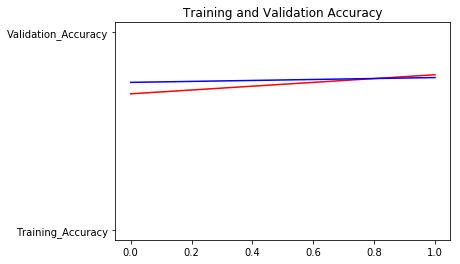

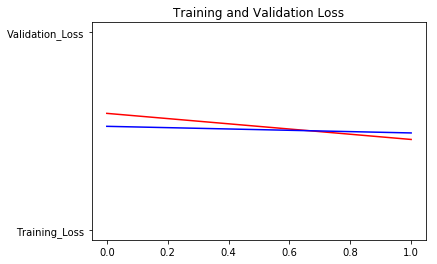

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'r',"Training_Accuracy")
plt.plot(epochs,val_acc,'b',"Validation_Accuracy")
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs,loss,'r',"Training_Loss")
plt.plot(epochs,val_loss,'b',"Validation_Loss")
plt.title('Training and Validation Loss')
plt.show()

